In [3]:
import sys

sys.path.insert(0, '/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction')

from config import *
from tools import *
from features import *

path_to_dfs = Path('bdiff_small_icml/firepoint/2x2/train/occurence_voting/')

name = 'df_test_full_0_all_4_0_risk-size-watershed_node.pkl'
name1 = 'df_test_full_0_all_5_0_risk-size-watershed_node.pkl'
name2 = 'df_test_full_0_all_6_0_risk-size-watershed_node.pkl'
name3 = 'df_test_full_0_all_7_0_risk-size-watershed_node.pkl'
name4 = 'df_test_full_0_all_departement_0_None_node.pkl'

df_test0 = read_object(name, path_to_dfs)
df_test0['Scale'] = 4
df_test0['Base'] = 'Watershed'

df_test1 = read_object(name1, path_to_dfs)
df_test1['Scale'] = 5
df_test1['Base'] = 'Watershed'

df_test2 = read_object(name2, path_to_dfs)
df_test2['Scale'] = 6
df_test2['Base'] = 'Watershed'

df_test3 = read_object(name3, path_to_dfs)
df_test3['Scale'] = 7
df_test3['Base'] = 'Watershed'

df_test4 = read_object(name4, path_to_dfs)
df_test4['Scale'] = 'Department'

name = 'df_test_full_0_all_4_0_risk-regular_node.pkl'
name1 = 'df_test_full_0_all_5_0_risk-regular_node.pkl'
name2 = 'df_test_full_0_all_6_0_risk-regular_node.pkl'
name3 = 'df_test_full_0_all_7_0_risk-regular_node.pkl'

df_test5 = read_object(name, path_to_dfs)
df_test5['Scale'] = 4
df_test5['Base'] = 'Grid'

df_test6 = read_object(name1, path_to_dfs)
df_test6['Scale'] = 5
df_test6['Base'] = 'Grid'

df_test8 = read_object(name2, path_to_dfs)
df_test8['Scale'] = 6
df_test8['Base'] = 'Grid'

df_test9 = read_object(name3, path_to_dfs)
df_test9['Scale'] = 7
df_test9['Base'] = 'Grid'

df_test = pd.concat((df_test0, df_test1, df_test2, df_test3, df_test4)).reset_index(drop=True)

2025-02-14 13:49:48,273 [INFO ]  bdiff_small_icml/firepoint/2x2/train/occurence_voting/df_test_full_0_all_5_0_risk-size-watershed_node.pkl not found
2025-02-14 13:49:48,273 [INFO ]  bdiff_small_icml/firepoint/2x2/train/occurence_voting/df_test_full_0_all_5_0_risk-size-watershed_node.pkl not found


TypeError: 'NoneType' object does not support item assignment

In [ ]:
df_test[(df_test['Scale'] == 4)]

In [42]:
df_test.Scale.unique()

array([4, 5, 6, 7, 'Department'], dtype=object)

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import math

def plot_bar_chart_by_scale(data, column_name_1, column_name_2, scale_column):
    """
    Plot the percentage distribution of two columns as grouped bar charts for each unique scale.

    Parameters:
        data (DataFrame): The pandas DataFrame containing the data.
        column_name_1 (str): The first column to visualize.
        column_name_2 (str): The second column to visualize.
        scale_column (str): The name of the scale column.
    """
    # Calculate percentage distribution for each scale and column
    percentages_1 = data.groupby(scale_column)[column_name_1].value_counts(normalize=True).mul(100).rename('Percentage_1').reset_index()
    percentages_2 = data.groupby(scale_column)[column_name_2].value_counts(normalize=True).mul(100).rename('Percentage_2').reset_index()

    # Get unique scales
    unique_scales = data[scale_column].unique()

    # Set up a 3x2 grid for plotting
    num_scales = len(unique_scales)
    plots_per_page = 6  # 3 columns x 2 rows
    num_pages = math.ceil(num_scales / plots_per_page)

    for page in range(num_pages):
        # Create a new figure
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()  # Flatten to make it easier to iterate over

        # Get the scales for this page
        start_idx = page * plots_per_page
        end_idx = min(start_idx + plots_per_page, num_scales)
        scales_on_page = unique_scales[start_idx:end_idx]

        for i, scale in enumerate(scales_on_page):
            ax = axes[i]
            # Filter data for the current scale
            scale_data_1 = percentages_1[percentages_1[scale_column] == scale]
            scale_data_2 = percentages_2[percentages_2[scale_column] == scale]

            # Get categories (x-ticks)
            categories = list(set(scale_data_1[column_name_1]) | set(scale_data_2[column_name_2]))

            # Align data to all categories (to handle missing values)
            scale_data_1 = scale_data_1.set_index(column_name_1).reindex(categories).fillna(0).reset_index()
            scale_data_2 = scale_data_2.set_index(column_name_2).reindex(categories).fillna(0).reset_index()

            # Bar positions
            bar_width = 0.4
            x = range(len(categories))

            # Plot bar chart for column_name_1
            ax.bar(
                [pos - bar_width / 2 for pos in x],
                scale_data_1['Percentage_1'],
                width=bar_width,
                label=column_name_1,
                color='skyblue',
                edgecolor='black'
            )

            # Plot bar chart for column_name_2
            ax.bar(
                [pos + bar_width / 2 for pos in x],
                scale_data_2['Percentage_2'],
                width=bar_width,
                label=column_name_2,
                color='salmon',
                edgecolor='black'
            )

            # Set chart title and labels
            ax.set_title(f"Scale: {scale}", fontsize=12)
            ax.set_xlabel("Categories", fontsize=10)
            ax.set_ylabel("Percentage (%)", fontsize=10)
            ax.set_xticks(x)
            ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=8)
            ax.set_ylim(0, 100)  # Set y-axis to 0-100 for percentage scale

            # Add percentages as text above the bars
            for bar, percent in zip(ax.patches, list(scale_data_1['Percentage_1']) + list(scale_data_2['Percentage_2'])):
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 1,
                    f"{percent:.1f}%",
                    ha='center',
                    fontsize=8
                )

            # Add legend
            ax.legend(fontsize=8, loc='upper right')

        # Hide unused subplots
        for j in range(len(scales_on_page), len(axes)):
            fig.delaxes(axes[j])

        # Adjust layout
        plt.tight_layout()
        plt.show()


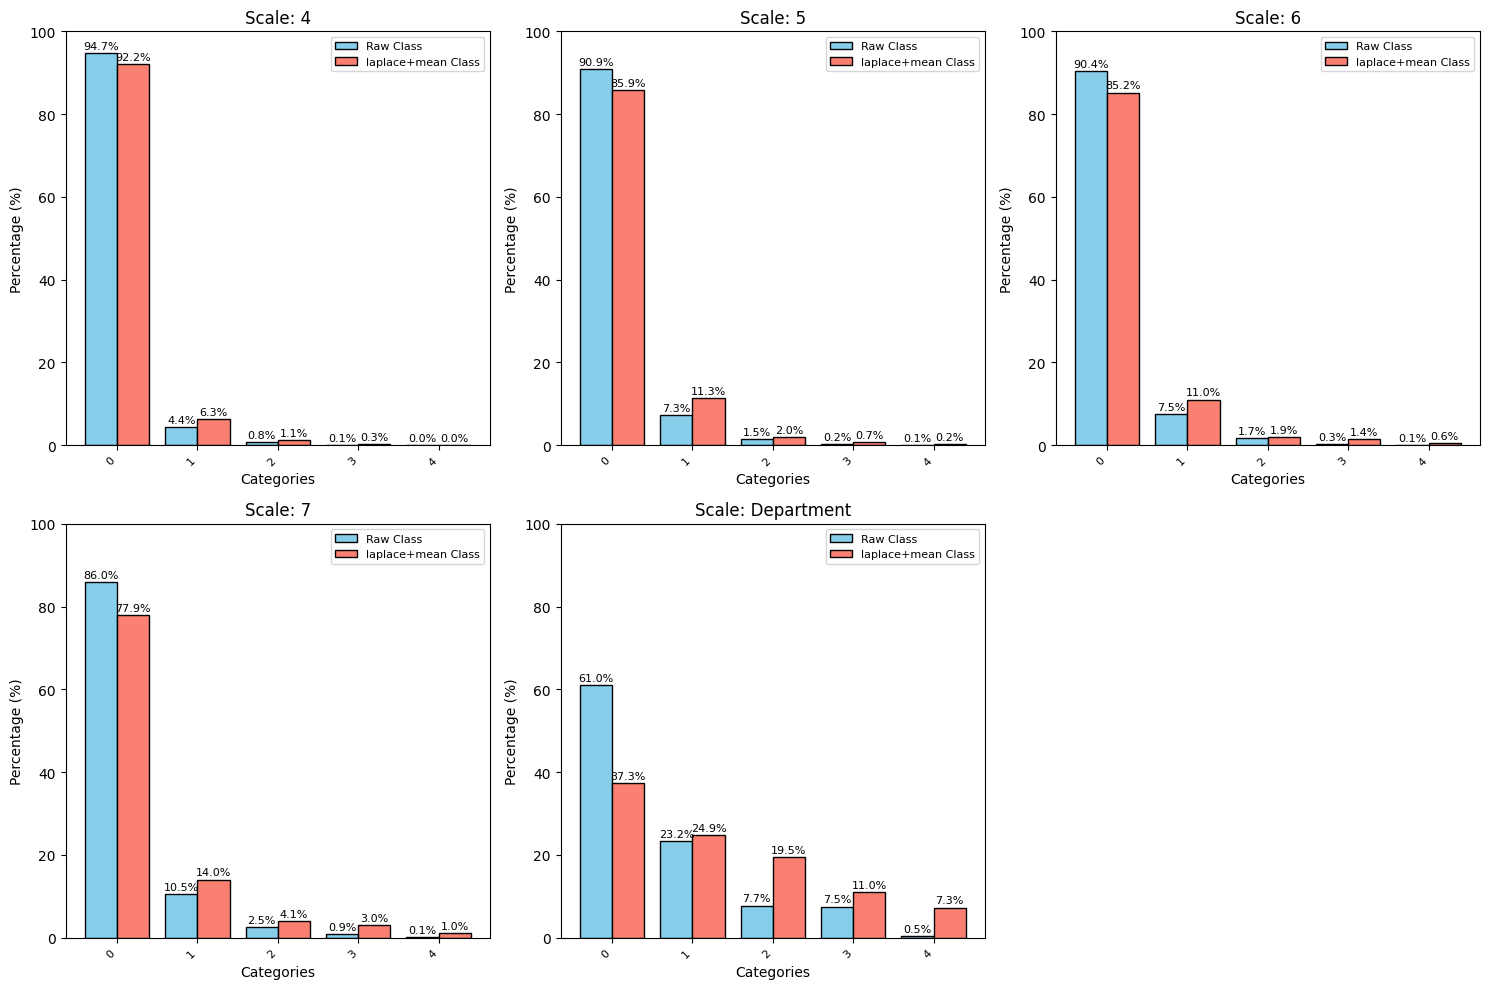

In [44]:
df_test.rename({'nbsinister-kmeans-5-Class-Dept' : 'Raw Class', 'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized' : 'laplace+mean Class'}, inplace=True, axis=1)
plot_bar_chart_by_scale(df_test, 'Raw Class', 'laplace+mean Class', 'Scale')

In [45]:
df_test[(df_test['Raw Class'] == 0) & (df_test['laplace+mean Class'] > 0)].shape[0] / df_test[(df_test['Raw Class'] == 0)].shape[0]

0.05714844896760936

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

def plot_histogram_by_base_and_departement(data, nbsinister_col, scale_col, base_col, dept_col, limit):
    """
    Plot histograms for each Base, showing the sum of nbsinister for each graph_id across all departments.
    Each Base will have its own set of graph_id, ordered by the sum of nbsinister for each department.
    The bars for each Base will be placed side by side, showing only the top 4 graph_ids for each Base.
    
    Parameters:
        data (DataFrame): The pandas DataFrame containing the data.
        nbsinister_col (str): The name of the 'nbsinister' column.
        scale_col (str): The name of the 'scale' column.
        base_col (str): The name of the 'Base' column.
        dept_col (str): The name of the 'Departement' column.
    """
    # Get unique scales
    unique_scales = data[scale_col].unique()

    # Set up a 3x2 grid for plotting
    num_scales = len(unique_scales)
    plots_per_page = 6  # 3 columns x 2 rows
    num_pages = math.ceil(num_scales / plots_per_page)

    for page in range(num_pages):
        # Create a new figure
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.flatten()  # Flatten to make it easier to iterate over

        # Get the scales for this page
        start_idx = page * plots_per_page
        end_idx = min(start_idx + plots_per_page, num_scales)
        scales_on_page = unique_scales[start_idx:end_idx]

        for i, scale in enumerate(scales_on_page):
            ax = axes[i]

            # Filter data for the current scale
            scale_data = data[data[scale_col] == scale]

            # Group by Base, Departement, and graph_id, then sum nbsinister
            group_data = scale_data.groupby([base_col, dept_col, 'graph_id'])[nbsinister_col].sum().reset_index()

            # Initialize x_positions for the bars
            bar_width = 0.35
            positions = []

            # Plot data for each Base
            for idx, base in enumerate(group_data[base_col].unique()):
                base_data = group_data[group_data[base_col] == base]

                # For each base, we need to handle sorting across all departments
                # First, sort the data by graph_id and sum nbsinister per graph_id
                base_data_sorted = base_data.sort_values(by=['graph_id', dept_col])

                # Create a list of graph_ids in sorted order
                graph_ids_sorted = base_data_sorted['graph_id'].unique()

                # Now, we will sum the values of nbsinister per graph_id across departments.
                summed_nbsinister = []
                depts = []
                for graph_id in graph_ids_sorted:
                    # Sum the nbsinister for each graph_id across all departments
                    graph_data = base_data_sorted[base_data_sorted['graph_id'] == graph_id]
                    summed_nbsinister.append(graph_data[nbsinister_col].sum())
                    depts.append(graph_data.departement.unique()[0])

                # Now, we sum nbsinister in the correct order across departments
                # Sort the graph_id sums by the summed nbsinister
                graph_id_sums = pd.DataFrame({
                    'graph_id': graph_ids_sorted,
                    'sum_nbsinister': summed_nbsinister,
                    'departement' : depts
                })

                result = pd.DataFrame(index=np.arange(limit))
                result['sum_nbsinister'] = 0
                for dept in graph_id_sums.departement.unique():
                        dept_data = graph_id_sums[graph_id_sums['departement'] == dept]
                        dept_data.sort_values('sum_nbsinister').reset_index(drop=True)
                        dept_data = dept_data.head(limit)
                        if dept_data.shape[0] < limit:
                            values = dept_data['sum_nbsinister'].values
                            values = np.concatenate((values, np.zeros(limit - dept_data.shape[0])))
                        else:
                            values = dept_data['sum_nbsinister'].values
                        result['sum_nbsinister'] += values
                
                result['graph_id'] = np.arange(0,limit)

                # Sort by summed nbsinister in descending order
                result = result.sort_values(by='sum_nbsinister', ascending=False)

                # Get the graph_ids and the corresponding sum of nbsinister
                graph_ids = result['graph_id'].values
                nbsinister_sums = result['sum_nbsinister'].values

                # Shift x positions for each Base
                base_positions = [pos + idx * bar_width for pos in range(len(graph_ids))]
                positions.extend(base_positions)

                # Plot bars for this Base with colors and edge color
                ax.bar(base_positions, nbsinister_sums, bar_width, label=f'Base {base}',
                       color='skyblue' if base == 'Grid' else 'salmon', edgecolor='black')

            # Set chart title and labels
            ax.set_title(f"Scale: {scale}", fontsize=12)
            ax.set_xlabel("Graph ID", fontsize=10)
            ax.set_ylabel(f"Sum of {nbsinister_col}", fontsize=10)

            # Set x-ticks to be graph_id with sorted order
            ax.set_xticks(positions)
            ax.set_xticklabels([0,1,2,3,4, '', '', '', '', ''], rotation=45, ha='right', fontsize=8)

            # Add legend
            ax.legend(fontsize=8, loc='upper right')

        # Hide unused subplots
        for j in range(len(scales_on_page), len(axes)):
            fig.delaxes(axes[j])

        # Adjust layout
        plt.tight_layout()
        plt.show()

# Exemple d'appel de la fonction
# df = pd.read_csv('your_dataframe.csv')
# plot_histogram_by_base_and_departement(df, 'nbsinister', 'scale', 'Base', 'Departement')


In [47]:
df_test = df_test.groupby(['graph_id', 'Scale', 'Base'])['nbsinister'].sum().reset_index()

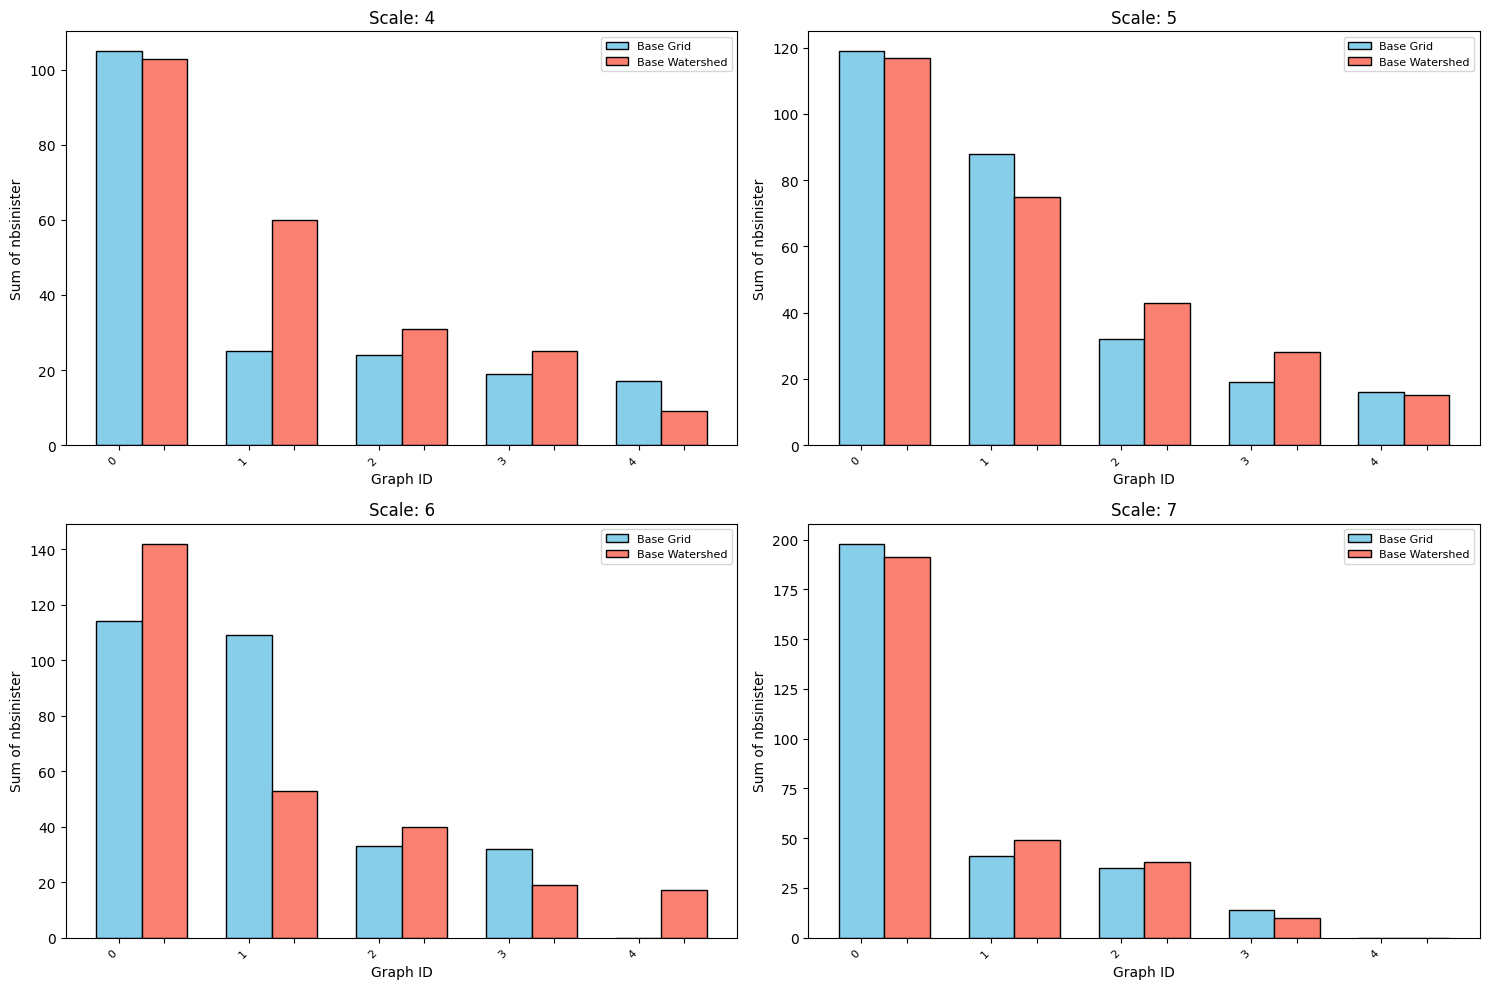

In [48]:
df_test = pd.concat((df_test0, df_test1, df_test2, df_test3, df_test5, df_test6, df_test8, df_test9)).reset_index(drop=True)

plot_histogram_by_base_and_departement(
    df_test,
    nbsinister_col='nbsinister', 
    scale_col='Scale',
    base_col='Base', 
    dept_col='departement',
    limit=5
)

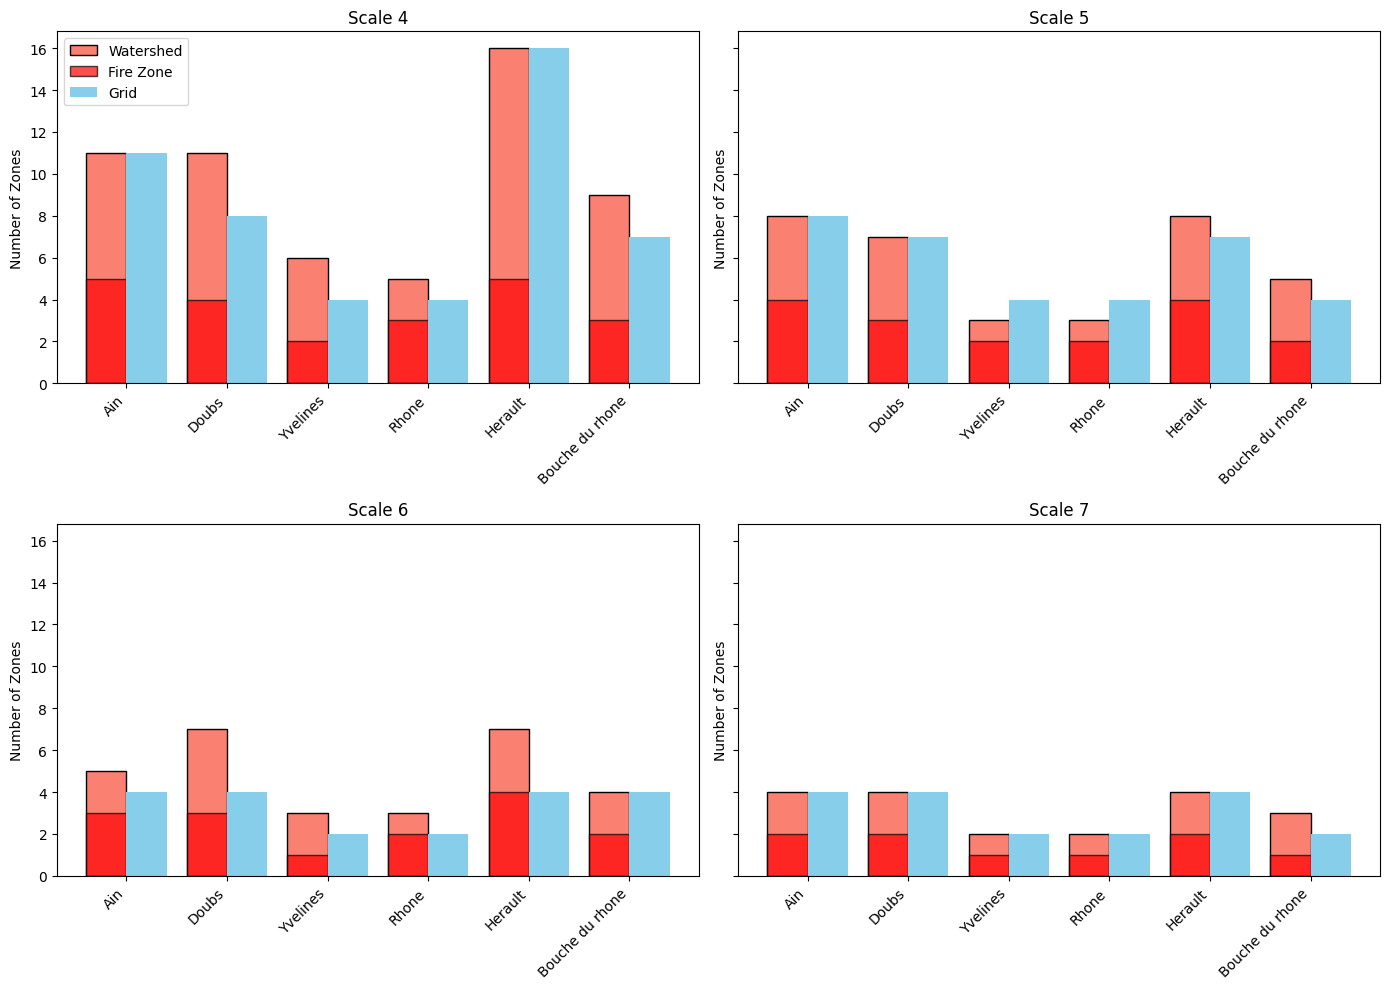

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Données
departments_all = ["Ain", "Doubs", "Rhone", "Yvelines", "Bouche du rhone", "Herault"]   
scales = ["4", "5", "6", "7"]

watershed_values = {
    "4": [11, 11, 5, 6, 9, 16],
    "5": [8, 7, 3, 3, 5, 8],
    "6": [5, 7, 3, 3, 4, 7],
    "7": [4, 4, 2, 2, 3, 4]
}

fire_zones = {
    "4": [5, 4, 3, 2, 3, 5],
    "5": [4, 3, 2, 2, 2, 4],
    "6": [3, 3, 2, 1, 2, 4],
    "7": [2, 2, 1, 1, 1, 2]
}

grid_values = {
    "4": [11, 8, 4, 4, 7, 16],
    "5": [8, 7, 4, 4, 4, 7],
    "6": [4, 4, 2, 2, 4, 4],
    "7": [4, 4, 2, 2, 2, 4]
}

def plot_segmentation(departments):
    """Plot segmentation histograms for selected departments on 2 rows without overlapping bars."""
    indices = [departments_all.index(dep) for dep in departments if dep in departments_all]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
    axes = axes.flatten()  # Transformer en liste pour itérer facilement

    width = 0.4  # Largeur des barres
    for i, scale in enumerate(scales):
        ax = axes[i]

        # Filtrer les valeurs en fonction des indices sélectionnés
        W_vals = np.array([watershed_values[scale][j] for j in indices])
        Fz_vals = np.array([fire_zones[scale][j] for j in indices])
        G_vals = np.array([grid_values[scale][j] for j in indices])
        x = np.arange(len(departments))  # Positions des groupes de barres

        # Affichage des histogrammes bien séparés
        bars_w = ax.bar(x - width/2, W_vals, width, color='salmon', label="Watershed", edgecolor='black')
        bars_fz = ax.bar(x - width/2, Fz_vals, width, color='red', label="Fire Zone", edgecolor='black', alpha=0.7)
        bars_g = ax.bar(x + width/2, G_vals, width, color='skyblue', label="Grid")
        
        # Configuration des axes
        ax.set_xticks(x)
        ax.set_xticklabels(departments, rotation=45, ha="right")
        ax.set_title(f"Scale {scale}")
        ax.set_ylabel("Number of Zones")

        # Ajouter une légende seulement sur le premier subplot
        if i == 0:
            ax.legend()

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation :
plot_segmentation(["Ain", "Doubs", "Yvelines", "Rhone", "Herault", "Bouche du rhone"])


### Plotting

In [50]:
from GNN.graph_structure import *

def remove_bad_pixel(data, mask):
    nan_mask = np.isnan(data)  # Masque des NaN
    filled_raster = data.copy()  # Copie du tableau original

    nearest_indices = ndimage.distance_transform_edt(
        nan_mask,
        return_distances=False,
        return_indices=True
    )

    # Utiliser les indices pour remplir les NaN avec les valeurs les plus proches
    filled_raster = data.copy()
    filled_raster[nan_mask] = data[tuple(nearest_indices[:, nan_mask])]

    # Remettre à jour raster_node
    data = filled_raster
    data[np.isnan(mask)] = np.nan

    return data

In [51]:
from GNN.arborescence import *

target_ain = read_object('departement-01-ainBinScale0.pkl', root_target / 'firepoint' / 'firemen' / 'occurence' / 'bin' / '2x2')
target_doubs = read_object('departement-25-doubsBinScale0.pkl', root_target / 'firepoint' / 'firemen' / 'occurence' / 'bin' / '2x2')
target_yvelines = read_object('departement-78-yvelinesBinScale0.pkl', root_target / 'firepoint' / 'firemen' / 'occurence' / 'bin' / '2x2')
target_rhone = read_object('departement-69-rhoneBinScale0.pkl', root_target / 'firepoint' / 'firemen' / 'occurence' / 'bin' / '2x2')
target_her = read_object('departement-34-heraultBinScale0.pkl', root_target / 'firepoint' / 'bdiff' / 'occurence' / 'bin' / '2x2')
target_br = read_object('departement-13-bouches-du-rhoneBinScale0.pkl', root_target / 'firepoint' / 'bdiff' / 'occurence' / 'bin' / '2x2')

target_ain = np.nansum(target_ain, axis=2)
target_doubs = np.nansum(target_doubs, axis=2)
target_yvelines = np.nansum(target_yvelines, axis=2)
target_rhone = np.nansum(target_rhone, axis=2)
target_her = np.nansum(target_her, axis=2)
target_br = np.nansum(target_br, axis=2)

population_ain = read_object('population.pkl', rootDisk / 'csv' / 'departement-01-ain' / 'raster' / '2x2')
population_doubs = read_object('population.pkl', rootDisk / 'csv' / 'departement-25-doubs' / 'raster' / '2x2')
population_yvelines = read_object('population.pkl', rootDisk / 'csv' / 'departement-78-yvelines' / 'raster' / '2x2')
population_rhone = read_object('population.pkl', rootDisk / 'csv' / 'departement-69-rhone' / 'raster' / '2x2')
population_her = read_object('population.pkl', rootDisk / 'csv' / 'departement-34-herault' / 'raster' / '2x2')
population_br = read_object('population.pkl', rootDisk / 'csv' / 'departement-13-bouches-du-rhone' / 'raster' / '2x2')

target_ain[np.isnan(population_ain)] = np.nan
target_doubs[np.isnan(population_doubs)] = np.nan
target_yvelines[np.isnan(population_yvelines)] = np.nan
target_rhone[np.isnan(population_rhone)] = np.nan
target_her[np.isnan(population_her)] = np.nan
target_br[np.isnan(population_br)] = np.nan

dir_scale = Path('firemen2/firepoint/2x2/train/raster')

scale4_ain = read_object('pred_departement-01-ain_4_no_background_watershed.pkl', dir_scale)
scale4_doubs = read_object('pred_departement-25-doubs_4_no_background_watershed.pkl', dir_scale)
scale4_yvelines = read_object('pred_departement-78-yvelines_4_no_background_watershed.pkl', dir_scale)
scale4_rhone = read_object('pred_departement-69-rhone_4_no_background_watershed.pkl', dir_scale)

scale7_ain = read_object('pred_departement-01-ain_7_no_background_watershed.pkl', dir_scale)
scale7_doubs = read_object('pred_departement-25-doubs_7_no_background_watershed.pkl', dir_scale)
scale7_yvelines = read_object('pred_departement-78-yvelines_7_no_background_watershed.pkl', dir_scale)
scale7_rhone = read_object('pred_departement-69-rhone_7_no_background_watershed.pkl', dir_scale)

scale5_ain = read_object('pred_departement-01-ain_5_no_background_watershed.pkl', dir_scale)
scale5_doubs = read_object('pred_departement-25-doubs_5_no_background_watershed.pkl', dir_scale)
scale5_yvelines = read_object('pred_departement-78-yvelines_5_no_background_watershed.pkl', dir_scale)
scale5_rhone = read_object('pred_departement-69-rhone_5_no_background_watershed.pkl', dir_scale)

scale6_ain = read_object('pred_departement-01-ain_6_no_background_watershed.pkl', dir_scale)
scale6_doubs = read_object('pred_departement-25-doubs_6_no_background_watershed.pkl', dir_scale)
scale6_yvelines = read_object('pred_departement-78-yvelines_6_no_background_watershed.pkl', dir_scale)
scale6_rhone = read_object('pred_departement-69-rhone_6_no_background_watershed.pkl', dir_scale)

dir_scale = Path('firemen/firepoint/2x2/train/raster')

scale4_regular_ain = read_object('departement-01-ainrasterScale4_risk-regular_node.pkl', dir_scale)
scale4_regular_doubs = read_object('departement-25-doubsrasterScale4_risk-regular_node.pkl', dir_scale)
scale4_regular_yvelines = read_object('departement-78-yvelinesrasterScale4_risk-regular_node.pkl', dir_scale)
scale4_regular_rhone = read_object('departement-69-rhonerasterScale4_risk-regular_node.pkl', dir_scale)

scale7_regular_ain = read_object('departement-01-ainrasterScale7_risk-regular_node.pkl', dir_scale)
scale7_regular_doubs = read_object('departement-25-doubsrasterScale7_risk-regular_node.pkl', dir_scale)
scale7_regular_yvelines = read_object('departement-78-yvelinesrasterScale7_risk-regular_node.pkl', dir_scale)
scale7_regular_rhone = read_object('departement-69-rhonerasterScale7_risk-regular_node.pkl', dir_scale)

scale5_regular_ain = read_object('departement-01-ainrasterScale5_risk-regular_node.pkl', dir_scale)
scale5_regular_doubs = read_object('departement-25-doubsrasterScale5_risk-regular_node.pkl', dir_scale)
scale5_regular_yvelines = read_object('departement-78-yvelinesrasterScale5_risk-regular_node.pkl', dir_scale)
scale5_regular_rhone = read_object('departement-69-rhonerasterScale5_risk-regular_node.pkl', dir_scale)

scale6_regular_ain = read_object('departement-01-ainrasterScale6_risk-regular_node.pkl', dir_scale)
scale6_regular_doubs = read_object('departement-25-doubsrasterScale6_risk-regular_node.pkl', dir_scale)
scale6_regular_yvelines = read_object('departement-78-yvelinesrasterScale6_risk-regular_node.pkl', dir_scale)
scale6_regular_rhone = read_object('departement-69-rhonerasterScale6_risk-regular_node.pkl', dir_scale)

dir_scale = Path('bdiff/firepoint/2x2/train/raster')

scale4_her = read_object('pred_departement-34-herault_4_no_background_watershed.pkl', dir_scale)
scale4_br = read_object('pred_departement-13-bouches-du-rhone_4_no_background_watershed.pkl', dir_scale)

scale5_her = read_object('pred_departement-34-herault_5_no_background_watershed.pkl', dir_scale)
scale5_br = read_object('pred_departement-13-bouches-du-rhone_5_no_background_watershed.pkl', dir_scale)

scale6_her = read_object('pred_departement-34-herault_6_no_background_watershed.pkl', dir_scale)
scale6_br = read_object('pred_departement-13-bouches-du-rhone_6_no_background_watershed.pkl', dir_scale)

scale7_her = read_object('pred_departement-34-herault_7_no_background_watershed.pkl', dir_scale)
scale7_br = read_object('pred_departement-13-bouches-du-rhone_7_no_background_watershed.pkl', dir_scale)

scale4_regular_her = read_object('departement-34-heraultrasterScale4_risk-regular_node.pkl', dir_scale)
scale4_regular_br = read_object('departement-13-bouches-du-rhonerasterScale4_risk-regular_node.pkl', dir_scale)

scale5_regular_her = read_object('departement-34-heraultrasterScale5_risk-regular_node.pkl', dir_scale)
scale5_regular_br = read_object('departement-13-bouches-du-rhonerasterScale5_risk-regular_node.pkl', dir_scale)

scale6_regular_her = read_object('departement-34-heraultrasterScale6_risk-regular_node.pkl', dir_scale)
scale6_regular_br = read_object('departement-13-bouches-du-rhonerasterScale6_risk-regular_node.pkl', dir_scale)

scale7_regular_her = read_object('departement-34-heraultrasterScale7_risk-regular_node.pkl', dir_scale)
scale7_regular_br = read_object('departement-13-bouches-du-rhonerasterScale7_risk-regular_node.pkl', dir_scale)

# Apply remove_bad_pixel to all scales for each department using the corresponding population data

# For department Ain
scale4_ain = remove_bad_pixel(scale4_ain, population_ain)
scale5_ain = remove_bad_pixel(scale5_ain, population_ain)
scale6_ain = remove_bad_pixel(scale6_ain, population_ain)
scale7_ain = remove_bad_pixel(scale7_ain, population_ain)

# For department Doubs
scale4_doubs = remove_bad_pixel(scale4_doubs, population_doubs)
scale5_doubs = remove_bad_pixel(scale5_doubs, population_doubs)
scale6_doubs = remove_bad_pixel(scale6_doubs, population_doubs)
scale7_doubs = remove_bad_pixel(scale7_doubs, population_doubs)

# For department Yvelines
scale4_yvelines = remove_bad_pixel(scale4_yvelines, population_yvelines)
scale5_yvelines = remove_bad_pixel(scale5_yvelines, population_yvelines)
scale6_yvelines = remove_bad_pixel(scale6_yvelines, population_yvelines)
scale7_yvelines = remove_bad_pixel(scale7_yvelines, population_yvelines)

# For department Rhone
scale4_rhone = remove_bad_pixel(scale4_rhone, population_rhone)
scale5_rhone = remove_bad_pixel(scale5_rhone, population_rhone)
scale6_rhone = remove_bad_pixel(scale6_rhone, population_rhone)
scale7_rhone = remove_bad_pixel(scale7_rhone, population_rhone)

# For dclustering_epartment Herault
scale4_her = remove_bad_pixel(scale4_her, population_her)
scale5_her = remove_bad_pixel(scale5_her, population_her)
scale6_her = remove_bad_pixel(scale6_her, population_her)
scale7_her = remove_bad_pixel(scale7_her, population_her)

# For dclustering_epartment Br
scale4_br = remove_bad_pixel(scale4_br, population_br)
scale5_br = remove_bad_pixel(scale5_br, population_br)
scale6_br = remove_bad_pixel(scale6_br, population_br)
scale7_br = remove_bad_pixel(scale7_br, population_br)

#######################
scale4_regular_ain = remove_bad_pixel(scale4_regular_ain, population_ain)
scale5_regular_ain = remove_bad_pixel(scale5_regular_ain, population_ain)
scale6_regular_ain = remove_bad_pixel(scale6_regular_ain, population_ain)
scale7_regular_ain = remove_bad_pixel(scale7_regular_ain, population_ain)

# For department Doubs
scale4_regular_doubs = remove_bad_pixel(scale4_regular_doubs, population_doubs)
scale5_regular_doubs = remove_bad_pixel(scale5_regular_doubs, population_doubs)
scale6_regular_doubs = remove_bad_pixel(scale6_regular_doubs, population_doubs)
scale7_regular_doubs = remove_bad_pixel(scale7_regular_doubs, population_doubs)

# For dregular_epartment Yvelines
scale4_regular_yvelines = remove_bad_pixel(scale4_regular_yvelines, population_yvelines)
scale5_regular_yvelines = remove_bad_pixel(scale5_regular_yvelines, population_yvelines)
scale6_regular_yvelines = remove_bad_pixel(scale6_regular_yvelines, population_yvelines)
scale7_regular_yvelines = remove_bad_pixel(scale7_regular_yvelines, population_yvelines)

# For dregular_epartment Rhone
scale4_regular_rhone = remove_bad_pixel(scale4_regular_rhone, population_rhone)
scale5_regular_rhone = remove_bad_pixel(scale5_regular_rhone, population_rhone)
scale6_regular_rhone = remove_bad_pixel(scale6_regular_rhone, population_rhone)
scale7_regular_rhone = remove_bad_pixel(scale7_regular_rhone, population_rhone)

# For dregular_clustering_epartment Herault
scale4_regular_her = remove_bad_pixel(scale4_regular_her, population_her)
scale5_regular_her = remove_bad_pixel(scale5_regular_her, population_her)
scale6_regular_her = remove_bad_pixel(scale6_regular_her, population_her)
scale7_regular_her = remove_bad_pixel(scale7_regular_her, population_her)

# For dregular_clustering_epartment Br
scale4_regular_br = remove_bad_pixel(scale4_regular_br, population_br)
scale5_regular_br = remove_bad_pixel(scale5_regular_br, population_br)
scale6_regular_br = remove_bad_pixel(scale6_regular_br, population_br)
scale7_regular_br = remove_bad_pixel(scale7_regular_br, population_br)

dir_scale = Path('firemen2/firepoint/2x2/train/raster')

scale4_clustering_ain = read_object('pred_departement-01-ain_4_no_background_clustering.pkl', dir_scale)
scale4_clustering_doubs = read_object('pred_departement-25-doubs_4_no_background_clustering.pkl', dir_scale)
scale4_clustering_yvelines = read_object('pred_departement-78-yvelines_4_no_background_clustering.pkl', dir_scale)
scale4_clustering_rhone = read_object('pred_departement-69-rhone_4_no_background_clustering.pkl', dir_scale)

scale7_clustering_ain = read_object('pred_departement-01-ain_7_no_background_clustering.pkl', dir_scale)
scale7_clustering_doubs = read_object('pred_departement-25-doubs_7_no_background_clustering.pkl', dir_scale)
scale7_clustering_yvelines = read_object('pred_departement-78-yvelines_7_no_background_clustering.pkl', dir_scale)
scale7_clustering_rhone = read_object('pred_departement-69-rhone_7_no_background_clustering.pkl', dir_scale)

scale5_clustering_ain = read_object('pred_departement-01-ain_5_no_background_clustering.pkl', dir_scale)
scale5_clustering_doubs = read_object('pred_departement-25-doubs_5_no_background_clustering.pkl', dir_scale)
scale5_clustering_yvelines = read_object('pred_departement-78-yvelines_5_no_background_clustering.pkl', dir_scale)
scale5_clustering_rhone = read_object('pred_departement-69-rhone_5_no_background_clustering.pkl', dir_scale)

scale6_clustering_ain = read_object('pred_departement-01-ain_6_no_background_clustering.pkl', dir_scale)
scale6_clustering_doubs = read_object('pred_departement-25-doubs_6_no_background_clustering.pkl', dir_scale)
scale6_clustering_yvelines = read_object('pred_departement-78-yvelines_6_no_background_clustering.pkl', dir_scale)
scale6_clustering_rhone = read_object('pred_departement-69-rhone_6_no_background_clustering.pkl', dir_scale)

dir_scale = Path('bdiff/firepoint/2x2/train/raster')

scale4_clustering_her = read_object('pred_departement-34-herault_4_no_background_clustering.pkl', dir_scale)
scale4_clustering_br = read_object('pred_departement-13-bouches-du-rhone_4_no_background_clustering.pkl', dir_scale)

scale5_clustering_her = read_object('pred_departement-34-herault_5_no_background_clustering.pkl', dir_scale)
scale5_clustering_br = read_object('pred_departement-13-bouches-du-rhone_5_no_background_clustering.pkl', dir_scale)

scale6_clustering_her = read_object('pred_departement-34-herault_6_no_background_clustering.pkl', dir_scale)
scale6_clustering_br = read_object('pred_departement-13-bouches-du-rhone_6_no_background_clustering.pkl', dir_scale)

scale7_clustering_her = read_object('pred_departement-34-herault_7_no_background_clustering.pkl', dir_scale)
scale7_clustering_br = read_object('pred_departement-13-bouches-du-rhone_7_no_background_clustering.pkl', dir_scale)

# For department Ain
scale4_clustering_ain = remove_bad_pixel(scale4_clustering_ain, population_ain)
scale5_clustering_ain = remove_bad_pixel(scale5_clustering_ain, population_ain)
scale6_clustering_ain = remove_bad_pixel(scale6_clustering_ain, population_ain)
scale7_clustering_ain = remove_bad_pixel(scale7_clustering_ain, population_ain)

# For dclustering_epartment Doubs
scale4_clustering_doubs = remove_bad_pixel(scale4_clustering_doubs, population_doubs)
scale5_clustering_doubs = remove_bad_pixel(scale5_clustering_doubs, population_doubs)
scale6_clustering_doubs = remove_bad_pixel(scale6_clustering_doubs, population_doubs)
scale7_clustering_doubs = remove_bad_pixel(scale7_clustering_doubs, population_doubs)

# For dclustering_epartment Yvelines
scale4_clustering_yvelines = remove_bad_pixel(scale4_clustering_yvelines, population_yvelines)
scale5_clustering_yvelines = remove_bad_pixel(scale5_clustering_yvelines, population_yvelines)
scale6_clustering_yvelines = remove_bad_pixel(scale6_clustering_yvelines, population_yvelines)
scale7_clustering_yvelines = remove_bad_pixel(scale7_clustering_yvelines, population_yvelines)

# For dclustering_epartment Rhone
scale4_clustering_rhone = remove_bad_pixel(scale4_clustering_rhone, population_rhone)
scale5_clustering_rhone = remove_bad_pixel(scale5_clustering_rhone, population_rhone)
scale6_clustering_rhone = remove_bad_pixel(scale6_clustering_rhone, population_rhone)
scale7_clustering_rhone = remove_bad_pixel(scale7_clustering_rhone, population_rhone)

# For dclustering_epartment Herault
scale4_clustering_her = remove_bad_pixel(scale4_clustering_her, population_her)
scale5_clustering_her = remove_bad_pixel(scale5_clustering_her, population_her)
scale6_clustering_her = remove_bad_pixel(scale6_clustering_her, population_her)
scale7_clustering_her = remove_bad_pixel(scale7_clustering_her, population_her)

# For dclustering_epartment Br
scale4_clustering_br = remove_bad_pixel(scale4_clustering_br, population_br)
scale5_clustering_br = remove_bad_pixel(scale5_clustering_br, population_br)
scale6_clustering_br = remove_bad_pixel(scale6_clustering_br, population_br)
scale7_clustering_br = remove_bad_pixel(scale7_clustering_br, population_br)

import numpy as np

def sum_target_by_scale(target, scale, scale_id_column='id'):
    """
    Sum the target values for each unique scale ID.
    
    Parameters:
    - target: Array of target values (e.g., the fire distribution).
    - scale: Array representing the scale corresponding to each target value (e.g., scale4 or scale7).
    - scale_id_column: Name of the scale ID column (default is 'id').
    
    Returns:
    - summed_scale: Array where each pixel corresponds to the sum of target values for each unique scale ID.
    """
    # Ensure scale and target have the same shape
    if target.shape != scale.shape:
        raise ValueError("The target and scale arrays must have the same shape.")
    
    # Create an empty array to hold the summed values
    summed_scale = np.zeros_like(scale, dtype=float)
    
    # Iterate through each unique scale ID
    unique_ids = np.unique(scale[~np.isnan(scale)])
    
    for scale_id in unique_ids:
        # Find the pixels that correspond to the current scale ID
        mask = (scale == scale_id)
        
        # Sum the target values for the current scale ID
        summed_scale[mask] = np.sum(target[mask])
    
    summed_scale[np.isnan(scale)] = np.nan
    return summed_scale

# Apply to each scale
scale4_sum_ain = sum_target_by_scale(target=target_ain, scale=scale4_ain)
scale4_sum_doubs = sum_target_by_scale(target=target_doubs, scale=scale4_doubs)
scale4_sum_yvelines = sum_target_by_scale(target=target_yvelines, scale=scale4_yvelines)
scale4_sum_rhone = sum_target_by_scale(target=target_rhone, scale=scale4_rhone)

scale4_sum_regular_ain = sum_target_by_scale(target=target_ain, scale=scale4_regular_ain)
scale4_sum_regular_doubs = sum_target_by_scale(target=target_doubs, scale=scale4_regular_doubs)
scale4_sum_regular_yvelines = sum_target_by_scale(target=target_yvelines, scale=scale4_regular_yvelines)
scale4_sum_regular_rhone = sum_target_by_scale(target=target_rhone, scale=scale4_regular_rhone)

scale4_sum_clustering_ain = sum_target_by_scale(target=target_ain, scale=scale4_clustering_ain)
scale4_sum_clustering_doubs = sum_target_by_scale(target=target_doubs, scale=scale4_clustering_doubs)
scale4_sum_clustering_yvelines = sum_target_by_scale(target=target_yvelines, scale=scale4_clustering_yvelines)
scale4_sum_clustering_rhone = sum_target_by_scale(target=target_rhone, scale=scale4_clustering_rhone)

# Optionally, replace the original variables with the new summed scales
# This will make the scale arrays hold the summed target values

2025-01-30 10:16:30,587 [INFO ]  firemen2/firepoint/2x2/train/raster/pred_departement-01-ain_4_no_background_watershed.pkl not found
2025-01-30 10:16:30,587 [INFO ]  firemen2/firepoint/2x2/train/raster/pred_departement-01-ain_4_no_background_watershed.pkl not found
2025-01-30 10:16:30,589 [INFO ]  firemen2/firepoint/2x2/train/raster/pred_departement-25-doubs_4_no_background_watershed.pkl not found
2025-01-30 10:16:30,589 [INFO ]  firemen2/firepoint/2x2/train/raster/pred_departement-25-doubs_4_no_background_watershed.pkl not found
2025-01-30 10:16:30,591 [INFO ]  firemen2/firepoint/2x2/train/raster/pred_departement-78-yvelines_4_no_background_watershed.pkl not found
2025-01-30 10:16:30,591 [INFO ]  firemen2/firepoint/2x2/train/raster/pred_departement-78-yvelines_4_no_background_watershed.pkl not found
2025-01-30 10:16:30,592 [INFO ]  firemen2/firepoint/2x2/train/raster/pred_departement-69-rhone_4_no_background_watershed.pkl not found
2025-01-30 10:16:30,592 [INFO ]  firemen2/firepoint/2

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [56]:
data = {
    "ain": {
        "target": target_ain,
        "population": population_ain,
        "scale4": scale4_ain,
        "scale5": scale5_ain,
        "scale6": scale6_ain,
        "scale7": scale7_ain,
        "scale4_clustering": scale4_clustering_ain,
        "scale5_clustering": scale5_clustering_ain,
        "scale6_clustering": scale6_clustering_ain,
        "scale7_clustering": scale7_clustering_ain,
        "scale4_regular": scale4_regular_ain,
        "scale5_regular": scale5_regular_ain,
        "scale6_regular": scale6_regular_ain,
        "scale7_regular": scale7_regular_ain,
    },
    "doubs": {
        "target": target_doubs,
        "population": population_doubs,
        "scale4": scale4_doubs,
        "scale5": scale5_doubs,
        "scale6": scale6_doubs,
        "scale7": scale7_doubs,
        "scale4_regular": scale4_regular_doubs,
        "scale5_regular": scale5_regular_doubs,
        "scale6_regular": scale6_regular_doubs,
        "scale7_regular": scale7_regular_doubs,
        "scale4_clustering": scale4_clustering_doubs,
        "scale5_clustering": scale5_clustering_doubs,
        "scale6_clustering": scale6_clustering_doubs,
        "scale7_clustering": scale7_clustering_doubs,
    },
    "yvelines": {
        "target": target_yvelines,
        "population": population_yvelines,
        "scale4": scale4_yvelines,
        "scale5": scale5_yvelines,
        "scale6": scale6_yvelines,
        "scale7": scale7_yvelines,
        "scale4_regular": scale4_regular_yvelines,
        "scale5_regular": scale5_regular_yvelines,
        "scale6_regular": scale6_regular_yvelines,
        "scale7_regular": scale7_regular_yvelines,
        "scale4_clustering": scale4_clustering_yvelines,
        "scale5_clustering": scale5_clustering_yvelines,
        "scale6_clustering": scale6_clustering_yvelines,
        "scale7_clustering": scale7_clustering_yvelines,
    },
    "rhone": {
        "target": target_rhone,
        "population": population_rhone,
        "scale4": scale4_rhone,
        "scale5": scale5_rhone,
        "scale6": scale6_rhone,
        "scale7": scale7_rhone,
        "scale4_regular": scale4_regular_rhone,
        "scale5_regular": scale5_regular_rhone,
        "scale6_regular": scale6_regular_rhone,
        "scale7_regular": scale7_regular_rhone,
        "scale4_clustering": scale4_clustering_rhone,
        "scale5_clustering": scale5_clustering_rhone,
        "scale6_clustering": scale6_clustering_rhone,
        "scale7_clustering": scale7_clustering_rhone,
    },

    "herault": {
        "target": target_her,
        "population": population_her,
        "scale4": scale4_her,
        "scale5": scale5_her,
        "scale6": scale6_her,
        "scale7": scale7_her,
        "scale4_clustering": scale4_clustering_her,
        "scale5_clustering": scale5_clustering_her,
        "scale6_clustering": scale6_clustering_her,
        "scale7_clustering": scale7_clustering_her,
        "scale4_regular": scale4_regular_her,
        "scale5_regular": scale5_regular_her,
        "scale6_regular": scale6_regular_her,
        "scale7_regular": scale7_regular_her,
    },

    "Bouches du rhone": {
        "target": target_br,
        "population": population_br,
        "scale4": scale4_br,
        "scale5": scale5_br,
        "scale6": scale6_br,
        "scale7": scale7_br,
        "scale4_clustering": scale4_clustering_br,
        "scale5_clustering": scale5_clustering_br,
        "scale6_clustering": scale6_clustering_br,
        "scale7_clustering": scale7_clustering_br,
        "scale4_regular": scale4_regular_br,
        "scale5_regular": scale5_regular_br,
        "scale6_regular": scale6_regular_br,
        "scale7_regular": scale7_regular_br,
    }
}

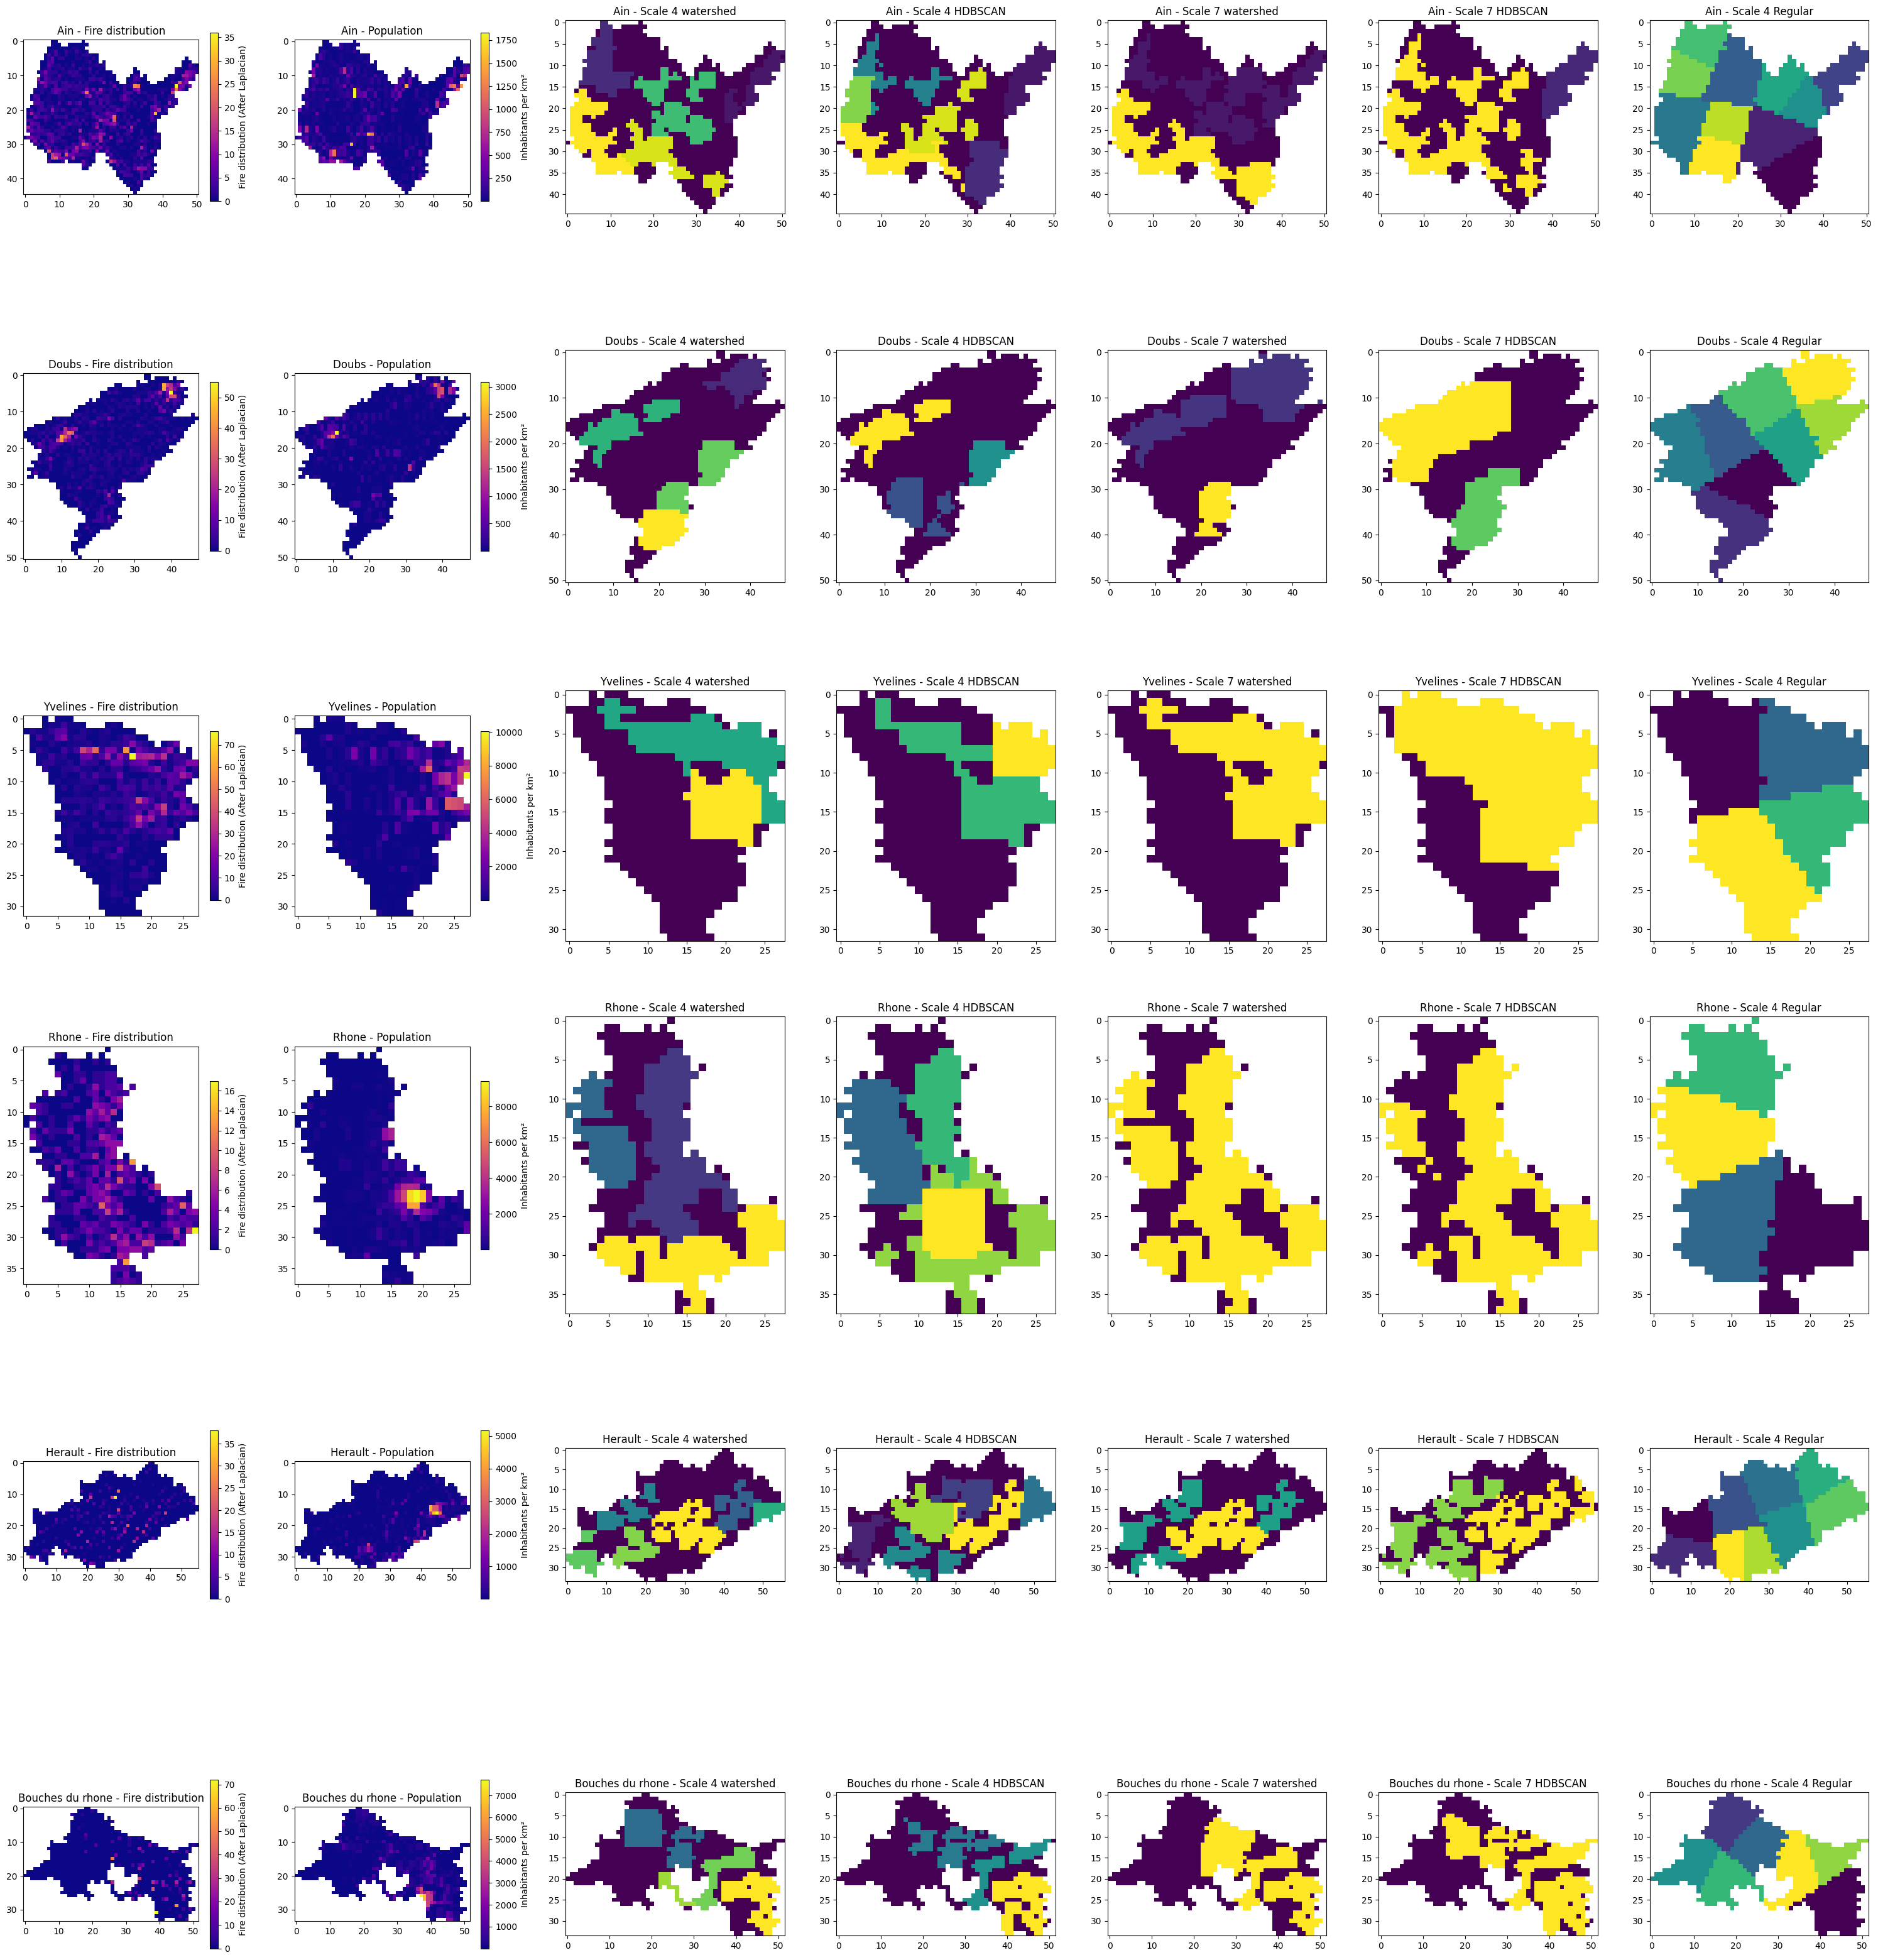

In [57]:
import matplotlib.pyplot as plt

def plot_all_departments(data):
    """
    Plot Fire distribution (After Laplacian), Population, Scale4, and Scale7 for all departments in a single figure.

    Parameters:
    - data: Dictionary containing data for all departments.
    """
    departments = list(data.keys())
    num_departments = len(departments)

    # Create a figure with a grid for all departments (num_departments rows, 7 columns)
    fig, axes = plt.subplots(num_departments, 7, figsize=(30, 6 * num_departments))

    for i, department in enumerate(departments):
        # Extract department data
        dept_data = data[department]
        target = dept_data["target"]
        population = dept_data["population"]
        scale4 = dept_data["scale4"]
        scale7 = dept_data["scale7"]
        scale4_clustering = dept_data["scale4_clustering"]
        scale7_clustering = dept_data["scale7_clustering"]
        scale4_regular = dept_data["scale4_regular"]
        scale7_regular = dept_data["scale7_regular"]

        # Plot Fire distribution (After Laplacian) with colorbar
        im1 = axes[i, 0].imshow(target, cmap="plasma")  # Same cmap as population
        axes[i, 0].set_title(f"{department.capitalize()} - Fire distribution")
        cbar1 = plt.colorbar(im1, ax=axes[i, 0], shrink=0.5)  # Shrink colorbar
        cbar1.set_label('Fire distribution (After Laplacian)')

        # Plot Population with colorbar and units (inhabitants per km²)
        im2 = axes[i, 1].imshow(population, cmap="plasma")
        axes[i, 1].set_title(f"{department.capitalize()} - Population")
        cbar2 = plt.colorbar(im2, ax=axes[i, 1], shrink=0.5)  # Shrink colorbar
        cbar2.set_label('Inhabitants per km²')

        # Plot Scale4
        im3 = axes[i, 2].imshow(scale4)
        axes[i, 2].set_title(f"{department.capitalize()} - Scale 4 watershed")
        # cbar3 = plt.colorbar(im3, ax=axes[i, 2])
        # cbar3.set_label('Sum of fire distribution')

        # Plot Scale4_clustering
        im3 = axes[i, 3].imshow(scale4_clustering)
        axes[i, 3].set_title(f"{department.capitalize()} - Scale 4 HDBSCAN")
        # cbar5 = plt.colorbar(im3, ax=axes[i, 3])
        # cbar5.set_label('Sum of fire distribution')

        # Plot Scale7
        im4 = axes[i, 4].imshow(scale7)
        axes[i, 4].set_title(f"{department.capitalize()} - Scale 7 watershed")
        # cbar4 = plt.colorbar(im4, ax=axes[i, 4])
        # cbar4.set_label('Sum of fire distribution')

        # Plot Scale7_clustering
        im4 = axes[i, 5].imshow(scale7_clustering)
        axes[i, 5].set_title(f"{department.capitalize()} - Scale 7 HDBSCAN")
        # cbar6 = plt.colorbar(im4, ax=axes[i, 5])
        # cbar6.set_label('Sum of fire distribution')

        # Plot Scale7
        im5 = axes[i, 6].imshow(scale4_regular)
        axes[i, 6].set_title(f"{department.capitalize()} - Scale 4 Regular")
        # cbar4 = plt.colorbar(im4, ax=axes[i, 4])
        # cbar4.set_label('Sum of fire distribution')

        # Optionally, you can uncomment this block for Scale 7 Regular if necessary
        """
        # Plot Scale7_clustering
        im6 = axes[i, 7].imshow(scale7_regular)
        axes[i, 7].set_title(f"{department.capitalize()} - Scale 7 Regular")
        # cbar6 = plt.colorbar(im4, ax=axes[i, 5])
        # cbar6.set_label('Sum of fire distribution')
        """

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()
    
# Exemple d'utilisation
plot_all_departments(data)